In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.linalg import null_space

# Q1

In [3]:

f = open(r'./assets/templeSparseRing/templeSR_par.txt','r')
assert f is not None
n= int(f.readline())
#Reading information for image 1
l = f.readline().split()
im1_fn=l[0]
K1=np.array([float(i) for i in l[1:10]]).reshape(3,3)
R1=np.array([float(i) for i in l[10:19]]).reshape(3,3)
t1=np.array([float(i) for i in l[19:22]]).reshape(3,1)
#Reading information for image 2
l = f.readline().split()
im2_fn=l[0]
K2=np.array([float(i) for i in l[1:10]]).reshape(3,3)
R2=np.array([float(i) for i in l[10:19]]).reshape(3,3)
t2=np.array([float(i) for i in l[19:22]]).reshape(3,1)

# Q2

In [4]:
#compute P1 and P2
P1 = K1@np.hstack((R1,t1)) #P = K*[R|t]
P2 = K2@np.hstack((R2,t2))
print(P1)
print(P2)

[[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]
[[-1.55882371e+02  1.44377186e+03 -5.42436214e+02  6.81806220e+01]
 [ 1.34928131e+03 -8.41979541e+01 -7.49443961e+02  1.99929996e+02]
 [-3.40999743e-01 -1.74474039e-01 -9.23730472e-01  6.00850565e-01]]


# Q3

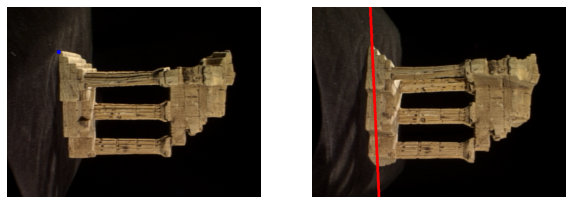

In [5]:
img1 = cv.imread(r'./assets/templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
img2 = cv.imread(r'./assets/templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

def skew(x):
    x = x.ravel()
    return np.array([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])

C = null_space(P1)
C = C*np.sign(C[0,0])
e2 = P2@C
e2x = skew(e2)
F = e2x@P2@np.linalg.pinv(P1)

x = np.array([130,115,1])
cv.circle(img1,(x[0],x[1]),5,(0,0,255),-1)

l2 = F@x.T
p1 = np.array([0,(l2[0]+l2[2])/l2[1]]).astype(int)
p2 = np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
cv.line(img2,(p1[0],p1[1]),(p2[0],p2[1]),(255,0,0),5)

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].imshow(img1)
ax[0].axis("off")
ax[1].imshow(img2)
ax[1].axis("off")

plt.show()

# Q4

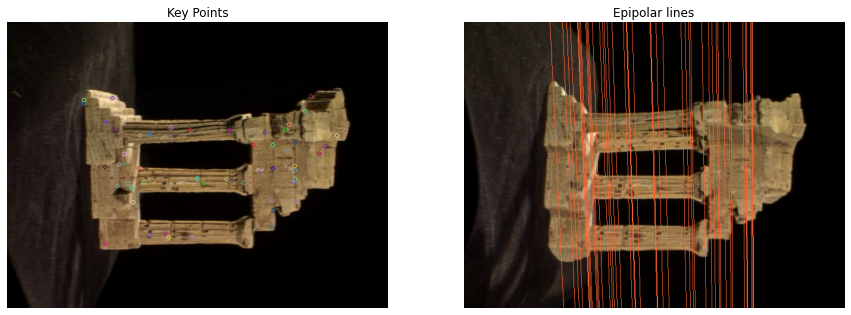

In [6]:
img1 = cv.imread(r'./assets/templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
img2 = cv.imread(r'./assets/templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
sift = cv.SIFT_create()

keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoint_1=sorted(keypoint_1, key = lambda x:x.response)
out = cv.drawKeypoints(img1,keypoint_1[:75],img1)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(out)
ax[0].axis("off")
ax[0].set_title("Key Points")
for i in range(len(keypoint_1[:75])):
    x=np.array([keypoint_1[i].pt[0],keypoint_1[i].pt[1],1])
    l2 = F@x.T
    p1=np.array([0,(l2[0]+l2[2])/l2[1]]).astype(int)
    p2=np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
    cv.line(img2,(p1[0],p1[1]),(p2[0],p2[1]),(255,100,50),1)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax[1].imshow(img2)
ax[1].set_title("Epipolar lines")
ax[1].axis("off")

plt.show()